In [125]:

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random as rn
from pprint import pprint as pp
import string


In [126]:

STUID = 993112013  # Your Student ID


def qdata(stuID, num=10):
    rn.seed(stuID)

    datasets = list(string.ascii_lowercase[1:24])
    rn.shuffle(datasets)
    return datasets[:num]


selected_letters = sorted(qdata(STUID))
selected_letters.append('y')

pp(selected_letters)


letter2index = {l: i for i, l in enumerate(string.ascii_lowercase[1:25], 1)}

# intersect of letter2index and qdata
selected_features = sorted([letter2index[l] for l in selected_letters])
print(selected_features)

    






['b', 'd', 'f', 'j', 'm', 'n', 'o', 't', 'w', 'x', 'y']
[1, 3, 5, 9, 12, 13, 14, 19, 22, 23, 24]


In [127]:

# Import flight_satisfaction.csv file with selected columns only based on english letters map to column numbers
df = pd.read_csv('flight_satisfaction.csv')

# Print the first 5 rows of the dataframe
df.head()









,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [128]:
# Check the data types of the columns
print(df.dtypes, end='\n\n')

# Check the number of rows and columns in the dataset
print(df.shape, end='\n\n')


# Check the number of missing values in each column
print(df.isnull().sum(), end='\n\n')


# Check the number of unique values in each column
print(df.nunique(), end='\n\n')





Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [129]:
# Handle duplicate values
df.drop_duplicates(inplace=True)




In [130]:
# missing data
missing_values_count = df.isnull().sum()
missing_values_count

# eliminate rows with missing values
df.dropna(inplace=True)


In [131]:
# # add a column to say passenger is adult or not if age is more than 18
# df['is_adult'] = np.where(df['Age'] > 18, 1, 0)
# df.head(20)



In [132]:
# Filter the columns based on indecies of selected features the way usecols works
selected_features.append(0)

original_df = df.copy()

df = df.iloc[:, selected_features]
df.head(10)


,id,Customer Type,Type of Travel,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Unnamed: 0
0,70172,Loyal Customer,Personal Travel,4,5,3,5,4,25,18.0,neutral or dissatisfied,0
1,5047,disloyal Customer,Business travel,2,1,3,1,1,1,6.0,neutral or dissatisfied,1
2,110028,Loyal Customer,Business travel,2,5,5,5,4,0,0.0,satisfied,2
3,24026,Loyal Customer,Business travel,5,2,2,2,1,11,9.0,neutral or dissatisfied,3
4,119299,Loyal Customer,Business travel,3,4,5,5,3,0,0.0,satisfied,4
5,111157,Loyal Customer,Personal Travel,4,1,2,1,4,0,0.0,neutral or dissatisfied,5
6,82113,Loyal Customer,Personal Travel,4,2,2,2,3,9,23.0,neutral or dissatisfied,6
7,96462,Loyal Customer,Business travel,3,5,5,5,4,4,0.0,satisfied,7
8,79485,Loyal Customer,Business travel,2,4,3,3,4,0,0.0,neutral or dissatisfied,8
9,65725,disloyal Customer,Business travel,3,2,3,3,4,0,0.0,neutral or dissatisfied,9


In [133]:
# drop useless columns
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['id'], inplace=True)

df.head(10)

,Customer Type,Type of Travel,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Personal Travel,4,5,3,5,4,25,18.0,neutral or dissatisfied
1,disloyal Customer,Business travel,2,1,3,1,1,1,6.0,neutral or dissatisfied
2,Loyal Customer,Business travel,2,5,5,5,4,0,0.0,satisfied
3,Loyal Customer,Business travel,5,2,2,2,1,11,9.0,neutral or dissatisfied
4,Loyal Customer,Business travel,3,4,5,5,3,0,0.0,satisfied
5,Loyal Customer,Personal Travel,4,1,2,1,4,0,0.0,neutral or dissatisfied
6,Loyal Customer,Personal Travel,4,2,2,2,3,9,23.0,neutral or dissatisfied
7,Loyal Customer,Business travel,3,5,5,5,4,4,0.0,satisfied
8,Loyal Customer,Business travel,2,4,3,3,4,0,0.0,neutral or dissatisfied
9,disloyal Customer,Business travel,3,2,3,3,4,0,0.0,neutral or dissatisfied


In [134]:
# Extract type of travel and class from the column 'Type of Travel' in a list
type_of_travel = df['Type of Travel'].tolist()
unique_type_of_travel = list(set(type_of_travel))

# Enum for type of travel
type_of_travel_enum = {k: i for i, k in enumerate(unique_type_of_travel)}
print(type_of_travel_enum)

# Replace the column with numerical values
df['Type of Travel'] = df['Type of Travel'].map(type_of_travel_enum)
df.head(10)


{'Business travel': 0, 'Personal Travel': 1}


,Customer Type,Type of Travel,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,1,4,5,3,5,4,25,18.0,neutral or dissatisfied
1,disloyal Customer,0,2,1,3,1,1,1,6.0,neutral or dissatisfied
2,Loyal Customer,0,2,5,5,5,4,0,0.0,satisfied
3,Loyal Customer,0,5,2,2,2,1,11,9.0,neutral or dissatisfied
4,Loyal Customer,0,3,4,5,5,3,0,0.0,satisfied
5,Loyal Customer,1,4,1,2,1,4,0,0.0,neutral or dissatisfied
6,Loyal Customer,1,4,2,2,2,3,9,23.0,neutral or dissatisfied
7,Loyal Customer,0,3,5,5,5,4,4,0.0,satisfied
8,Loyal Customer,0,2,4,3,3,4,0,0.0,neutral or dissatisfied
9,disloyal Customer,0,3,2,3,3,4,0,0.0,neutral or dissatisfied


In [135]:
# replace satisfied with 1 and neutral or dissatisfied with 0
df['satisfaction'] = np.where(df['satisfaction'] == 'satisfied', 1, 0)


df.head(10)

,Customer Type,Type of Travel,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,1,4,5,3,5,4,25,18.0,0
1,disloyal Customer,0,2,1,3,1,1,1,6.0,0
2,Loyal Customer,0,2,5,5,5,4,0,0.0,1
3,Loyal Customer,0,5,2,2,2,1,11,9.0,0
4,Loyal Customer,0,3,4,5,5,3,0,0.0,1
5,Loyal Customer,1,4,1,2,1,4,0,0.0,0
6,Loyal Customer,1,4,2,2,2,3,9,23.0,0
7,Loyal Customer,0,3,5,5,5,4,4,0.0,1
8,Loyal Customer,0,2,4,3,3,4,0,0.0,0
9,disloyal Customer,0,3,2,3,3,4,0,0.0,0


In [136]:
# Extract type of customer and class from the column 'Customer Type' in a list
customer_type = df['Customer Type'].tolist()
unique_customer_type = list(set(customer_type))

# Enum for customer type
customer_type_enum = {k: i for i, k in enumerate(unique_customer_type)}

# Replace the column with numerical values
df['Customer Type'] = df['Customer Type'].map(customer_type_enum)
df.head(10)


,Customer Type,Type of Travel,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,4,5,3,5,4,25,18.0,0
1,0,0,2,1,3,1,1,1,6.0,0
2,1,0,2,5,5,5,4,0,0.0,1
3,1,0,5,2,2,2,1,11,9.0,0
4,1,0,3,4,5,5,3,0,0.0,1
5,1,1,4,1,2,1,4,0,0.0,0
6,1,1,4,2,2,2,3,9,23.0,0
7,1,0,3,5,5,5,4,4,0.0,1
8,1,0,2,4,3,3,4,0,0.0,0
9,0,0,3,2,3,3,4,0,0.0,0


In [137]:

df.describe()

,Customer Type,Type of Travel,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.817248,0.310143,3.060081,3.202126,3.250497,3.439765,3.304323,14.747939,15.178678,0.433394
std,0.386465,0.462554,1.525233,1.329401,1.349433,1.318896,1.265396,38.116737,38.698682,0.495546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,4.000000,4.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [138]:
# deal with outliners

df = df[df['Departure Delay in Minutes'] < 100]
df = df[df['Arrival Delay in Minutes'] < 100]


df.describe()


,Customer Type,Type of Travel,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,99578.000000,99578.000000,99578.000000,99578.000000,99578.000000,99578.000000,99578.000000,99578.000000,99578.000000,99578.000000
mean,0.817640,0.310621,3.060284,3.208661,3.253078,3.445359,3.307066,8.922623,9.157505,0.436432
std,0.386143,0.462750,1.526528,1.328461,1.349680,1.318105,1.263039,17.596357,17.630477,0.495945
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,4.000000,4.000000,4.000000,5.000000,4.000000,9.000000,10.000000,1.000000
max,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,99.000000,99.000000,1.000000


In [139]:
# # # Perform data normalization on the continuous features
# df = (df - df.mean()) / df.std()
# df.describe()

In [140]:
# Perform data normalization 




(9, 1600) (9, 400) (1, 1600) (1, 400)


Training:  40%|███▉      | 199/500 [00:00<00:00, 678.42it/s]

Training: 100%|██████████| 500/500 [00:00<00:00, 710.15it/s]


Accuracy: 0.78


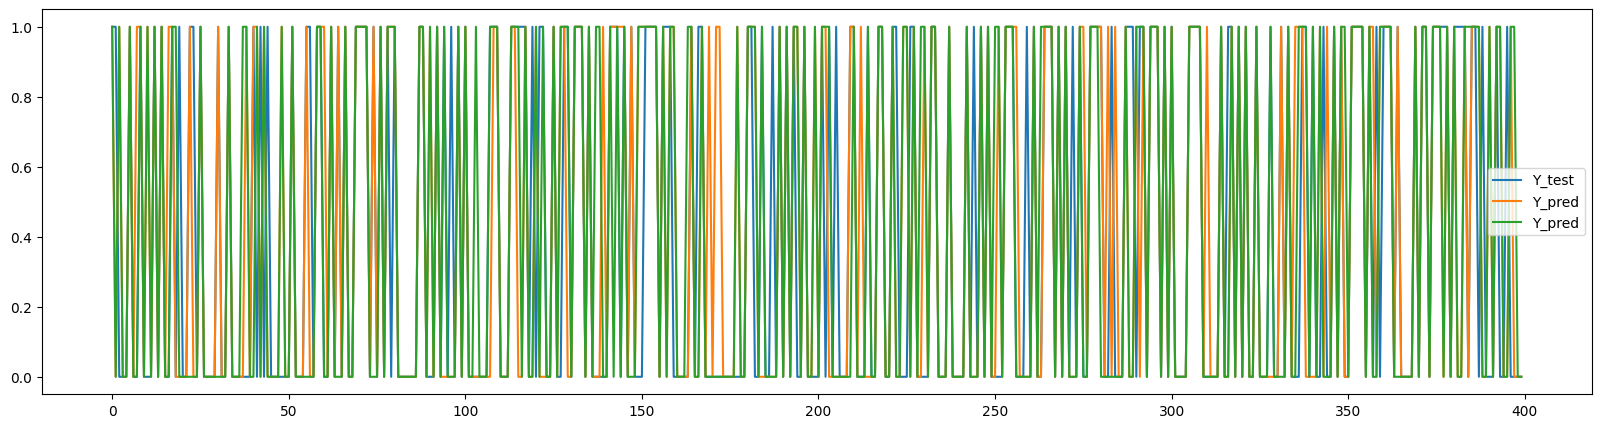

In [141]:
import numpy as np



# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    parameters = {
        'W1': np.random.randn(hidden_size, input_size),
        'b1': np.zeros((hidden_size, 1)),
        'W2': np.random.randn(output_size, hidden_size),
        'b2': np.zeros((output_size, 1))
    }
    return parameters

# Forward propagation
def forward_propagation(X, parameters):
    Z1 = np.dot(parameters['W1'], X) + parameters['b1']
    A1 = sigmoid(Z1)
    Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
    A2 = sigmoid(Z2)
    cache = {'A1': A1, 'A2': A2}
    return A2, cache

# Compute loss
def compute_loss(Y, Y_pred):
    loss = np.mean((Y - Y_pred) ** 2)
    return loss

# Backward propagation
def backward_propagation(X, Y, parameters, cache):
    m = X.shape[1]
    dZ2 = cache['A2'] - Y
    dW2 = (1 / m) * np.dot(dZ2, cache['A1'].T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(parameters['W2'].T, dZ2) * sigmoid_derivative(cache['A1'])
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return grads

# Update parameters
def update_parameters(parameters, grads, learning_rate):
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']
    return parameters

# Training the neural network
def train(X, Y, input_size, hidden_size, output_size, learning_rate, iterations):
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    losses = []
    for _ in tqdm(range(iterations), desc='Training'):
        Y_pred, cache = forward_propagation(X, parameters)
        loss = compute_loss(Y, Y_pred)
        losses.append(loss)
        grads = backward_propagation(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        # if i % 100 == 0:
        #     print(f"Iteration {i}, Loss: {loss:.4f}")
    return parameters



# Random 2000 rows from the dataframe
sample = df.sample(2000)

Y_train = sample['satisfaction'].to_numpy()[:1600].reshape(1, -1)
Y_test = sample['satisfaction'].to_numpy()[1600:].reshape(1, -1)

sample.drop(columns=['satisfaction'], inplace=True)

X = sample.to_numpy()

# Split it to 1600 training examples and 400 test examples
X_train = X[:1600].T
X_test = X[1600:].T


print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

input_size = X_train.shape[0]  # Number of input features
hidden_size = 64 # Number of neurons in hidden layer
output_size = 2 # Number of output features
learning_rate = 0.1
iterations = 500

trained_parameters = train(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, iterations)

# Predict
Y_pred, _ = forward_propagation(X_test, trained_parameters)

# Consider a threshold of 0.5 for binary classification
Y_pred = np.where(Y_pred > 0.5, 1, 0)

# Calculate accuracy
accuracy = np.mean(Y_pred == Y_test)
print(f"Accuracy: {accuracy:.2f}")

# Write Y_pred along with Y_test to result.csv file
result = pd.DataFrame({'Y_test': Y_test[0], 'Y_pred': Y_pred[0]})
result.to_csv('result.csv', index=False)





